# 기울기

### 기울기 소실 문제

In [34]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

np.random.seed(0)
weights = np.random.randn(10, 10) * 0.01
x = np.random.randn(10, 1)

for i in range(1, 11):
    x = sigmoid(np.dot(weights, x))
    print(f'{i}번째 층 출력 평균: {np.mean(x)}')

1번째 층 출력 평균: 0.4923981391662232
2번째 층 출력 평균: 0.5007433168636295
3번째 층 출력 평균: 0.5007308165030734
4번째 층 출력 평균: 0.5007305713032845
5번째 층 출력 평균: 0.5007305725302615
6번째 층 출력 평균: 0.5007305725406197
7번째 층 출력 평균: 0.5007305725405601
8번째 층 출력 평균: 0.5007305725405591
9번째 층 출력 평균: 0.5007305725405591
10번째 층 출력 평균: 0.5007305725405591


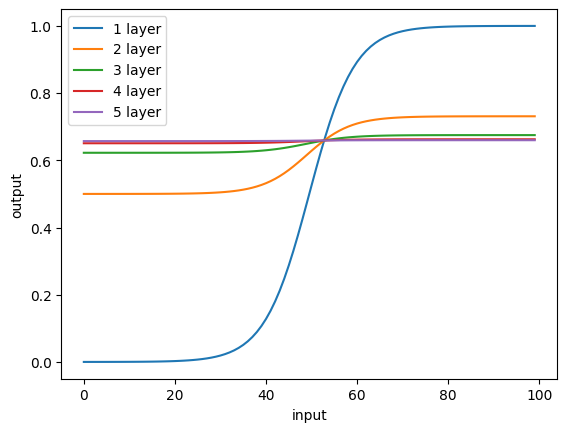

In [35]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

for i in range(1, 6):
    x = sigmoid(x)
    plt.plot(x, label=f'{i} layer')

plt.xlabel('input')
plt.ylabel('output')
plt.legend()
plt.show()

- 활성화 함수 변경

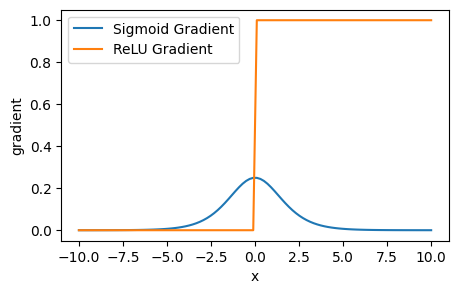

In [36]:
def relu(x):
    return np.maximum(0, x)

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_grad(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(5, 3))
plt.plot(x, sigmoid_grad(x), label="Sigmoid Gradient")
plt.plot(x, relu_grad(x), label="ReLU Gradient")
plt.xlabel('x')
plt.ylabel('gradient')
plt.legend()
plt.show()

- 잔차 연결(Residual Connection) 효과

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim

In [38]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        return self.layer2(torch.relu(self.layer1(x)))

In [39]:
class ResidualNN(nn.Module):
    def __init__(self):
        super(ResidualNN, self).__init__()
        self.layer = nn.Linear(10, 10)

    def forward(self, x):
        return x + torch.relu(self.layer(x))

In [40]:
class DeeperResidualNN(nn.Module):
    def __init__(self):
        super(DeeperResidualNN, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 10)
        self.layer3 = nn.Linear(10, 10)

    def forward(self, x):
        residual = x
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)
        return x + residual

In [41]:
simple_model = SimpleNN()
residual_model = ResidualNN()

x = torch.randn(1, 10)

output_simple = simple_model(x)
output_residual = residual_model(x)

print(f'입력값-일반 신경망: {x - output_simple}')
print(f'입력값-잔차 연결 신경망: {x - output_residual}')

입력값-일반 신경망: tensor([[-0.2433,  0.9451,  1.3391, -0.5972,  0.0050, -0.0365,  0.4373,  0.6236,
         -0.7572,  1.2086]], grad_fn=<SubBackward0>)
입력값-잔차 연결 신경망: tensor([[-0.0544, -0.1564, -0.6042, -0.0388, -0.0650, -0.4854, -0.0542, -0.3112,
         -0.0673,  0.0000]], grad_fn=<SubBackward0>)


In [42]:
# 기울기 변화

# 데이터 생성
x = torch.randn(100, 10)
y = torch.randn(100, 10)

# 모델 생성
sim_model = SimpleNN()
res_model = ResidualNN()
deep_res_model = DeeperResidualNN()

# 손실함수, 옵티마이저 생성
criterion = nn.MSELoss()
sim_optim = optim.Adam(sim_model.parameters(), lr=0.01)
res_optim = optim.Adam(res_model.parameters(), lr=0.01)
deep_res_optim = optim.Adam(deep_res_model.parameters(), lr=0.01)

In [43]:
# 학습 루프
epochs = 100
loss_sim_list = []
loss_res_list = []
deep_res_loss_list = []

for epoch in range(epochs):
    sim_optim.zero_grad()
    sim_output = sim_model(x)
    sim_loss = criterion(sim_output, y)
    sim_loss.backward()
    sim_optim.step()
    loss_sim_list.append(sim_loss.item())

    res_optim.zero_grad()
    res_output = res_model(x)
    res_loss = criterion(res_output, y)
    res_loss.backward()
    res_optim.step()
    loss_res_list.append(res_loss.item())

    deep_res_optim.zero_grad()
    deep_res_output = deep_res_model(x)
    deep_res_loss = criterion(deep_res_output, y)
    deep_res_loss.backward()
    deep_res_optim.step()
    deep_res_loss_list.append(deep_res_loss.item())

print(f'일반 신경망 최종 손실값: {loss_sim_list[-1]:.4f}')
print(f'잔차 연결 신경망 최종 손실값: {loss_res_list[-1]:.4f}')
print(f'더 깊은 잔차 연결 신경망 최종 손실값: {deep_res_loss_list[-1]:.4f}')

for param in sim_model.parameters():
    print(f'일반 신경망 기울기 크기: {param.grad.norm()}')

for param in res_model.parameters():
    print(f'잔차 연결 신경망 기울기 크기: {param.grad.norm()}')

for param in deep_res_model.parameters():
    print(f'더 깊은 잔차 연결 신경망 기울기 크기: {param.grad.norm()}')

일반 신경망 최종 손실값: 0.7713
잔차 연결 신경망 최종 손실값: 1.5722
더 깊은 잔차 연결 신경망 최종 손실값: 0.8694
일반 신경망 기울기 크기: 0.027143588289618492
일반 신경망 기울기 크기: 0.009178532287478447
일반 신경망 기울기 크기: 0.014986708760261536
일반 신경망 기울기 크기: 0.011369159445166588
잔차 연결 신경망 기울기 크기: 0.06631538271903992
잔차 연결 신경망 기울기 크기: 0.01580989360809326
더 깊은 잔차 연결 신경망 기울기 크기: 0.04194336384534836
더 깊은 잔차 연결 신경망 기울기 크기: 0.021064965054392815
더 깊은 잔차 연결 신경망 기울기 크기: 0.05065293610095978
더 깊은 잔차 연결 신경망 기울기 크기: 0.015706229954957962
더 깊은 잔차 연결 신경망 기울기 크기: 0.04665541648864746
더 깊은 잔차 연결 신경망 기울기 크기: 0.011461655609309673
